# 02 — Scenario Model (Base/Upside/Downside)

- Build simple 12-month projection
- Define base / upside / downside assumptions
- Compare contribution and margin % across scenarios

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Establish path to root directory
sys.path.append(os.path.abspath(os.path.join('..')))

# 2. Import quantitative module
from src.scenario_model import project_monthly_economics

In [2]:
# 3. Generate Strategic Scenarios (12-Month Horizon)

# Base Case: Current C1 Performance (38% Target)
base = project_monthly_economics(
    base_members=12000, arpu_fee=45, requests_per_member=0.55,
    revenue_per_request=12.5, variable_cost_per_request=7.2,
    partner_fee_per_request=0.9, monthly_growth=0.02,
    monthly_churn=0.015, months=12
)

# Upside Case: Velocity Black Benchmark (Option A - 44% Target)
upside = project_monthly_economics(
    base_members=12000, arpu_fee=50, requests_per_member=0.6,
    revenue_per_request=18.0, variable_cost_per_request=7.0,
    partner_fee_per_request=0.8, monthly_growth=0.04,
    monthly_churn=0.01, months=12
)

# Downside Case: SLA Failure & Churn Risk (29% Target)
downside = project_monthly_economics(
    base_members=12000, arpu_fee=40, requests_per_member=0.5,
    revenue_per_request=12.0, variable_cost_per_request=8.0,
    partner_fee_per_request=1.0, monthly_growth=0.01,
    monthly_churn=0.03, months=12
)

# Output terminal month margin for validation
print(f"Base Month 12 Margin: {base['contribution_margin_pct'].iloc[-1]*100:.1f}%")

Base Month 12 Margin: 91.4%


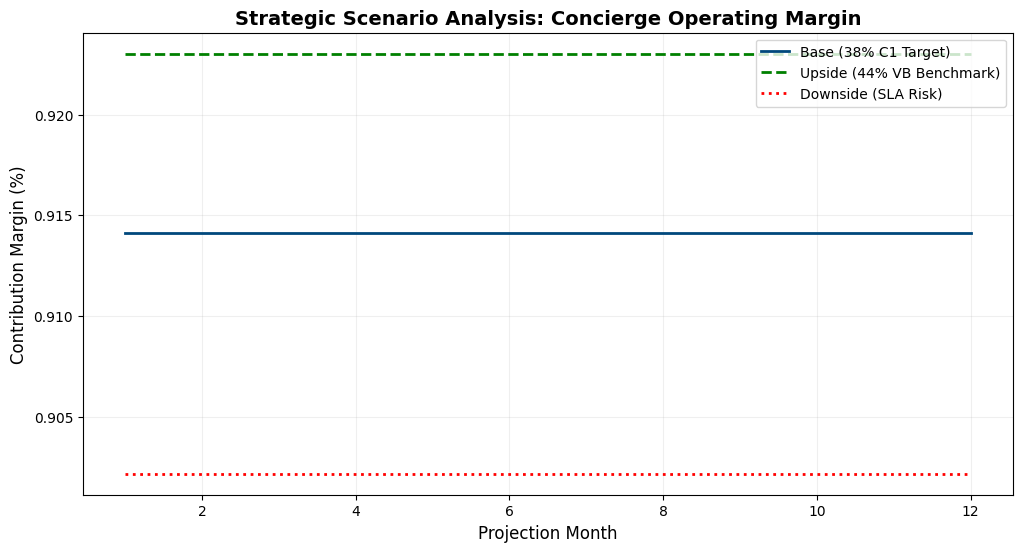

In [3]:
# 4. Render Scenario Comparison Visualization
plt.figure(figsize=(12, 6))

plt.plot(base['month'], base['contribution_margin_pct'], label='Base (38% C1 Target)', color='#00487C', linewidth=2)
plt.plot(upside['month'], upside['contribution_margin_pct'], label='Upside (44% VB Benchmark)', color='green', linestyle='--', linewidth=2)
plt.plot(downside['month'], downside['contribution_margin_pct'], label='Downside (SLA Risk)', color='red', linestyle=':', linewidth=2)

plt.title('Strategic Scenario Analysis: Concierge Operating Margin', fontsize=14, fontweight='bold')
plt.xlabel('Projection Month', fontsize=12)
plt.ylabel('Contribution Margin (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()